# Let's go multi-modal!!

We can use DALL-E-3, the image generation model behind GPT-4o, to make us some images

Let's put this in a function called artist.

### Price alert: each time I generate an image it costs about 4c - don't go crazy with images!

In [36]:
# The os module in Python provides a way to interact with the operating system. It’s typically used to:
# access environment variables, which can securely store API keys, tokens, or other configuration details that shouldn't be hardcoded.
import os

# The json module is used for parsing and serializing JSON (JavaScript Object Notation) data.
# JSON is a common data format for exchanging data between servers and clients or for configuration files. 
# In this context, it is used to handle API responses or to format data for storage or processing.
import json

# load_dotenv() loads environment variables from a .env file into the program's environment. 
from dotenv import load_dotenv

# This line imports OpenAI’s SDK (software development kit), which allows you to interact with OpenAI's API and models, such as DALL-E.
from openai import OpenAI

In [37]:
# Some imports for handling images

# The base64 library is used for encoding and decoding data in Base64 format, which is commonly used to transfer image data as strings (e.g., when returning image data from an API).
# Base64-encoded data is easier to transmit or store as a single string, which is necessary for certain web-based operations or for embedding images directly within JSON or HTML.
import base64

# BytesIO is a memory buffer that allows you to treat bytes data as a file-like object. 
# It’s used here to hold image data in memory, which enables converting between different formats without needing to save to disk.
# For instance, an API might return an image in a specific format, and BytesIO allows you to easily work with it.
from io import BytesIO

# The PIL library (specifically the Pillow package, which is a modern fork) allows image processing. 
# The Image class lets you open, manipulate, and save images in various formats.
# In this context, it could be used to visualize images generated by the DALL-E model, perform transformations, or save them to disk.
from PIL import Image

In [38]:
# Initialization

load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
MODEL = "gpt-4o-mini"
openai = OpenAI() # Initialize an instance of the OpenAI class

In [39]:
def artist(city):
    image_response = openai.images.generate(
        model = "dall-e-3", # This version of DALL-E specializes in generating high-quality, complex images from text prompts.
        prompt = f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
        size = "1024x1024", # Specify the image resolution as 1024x1024 pixels
        n = 1, # Request only one image.
        response_format = "b64_json", # Request the response in Base64 format, packaged as JSON. 
        )
    
    # Accesses the first image's Base64-encoded data from the JSON response. 
    # b64_json provides the Base64 string, which represents the binary image data in text form.
    image_base64 = image_response.data[0].b64_json
    
    # Decodes the Base64 string back into binary data, so it can be used to create an actual image file in memory.
    image_data = base64.b64decode(image_base64)
    
    # BytesIO(image_data): Wraps the binary image data in a BytesIO object, allowing it to be handled as if it were a file
    # Image.open(): Opens the BytesIO object as a PIL Image object. This allows the image to be displayed directly or further manipulated if needed.
    return Image.open(BytesIO(image_data))

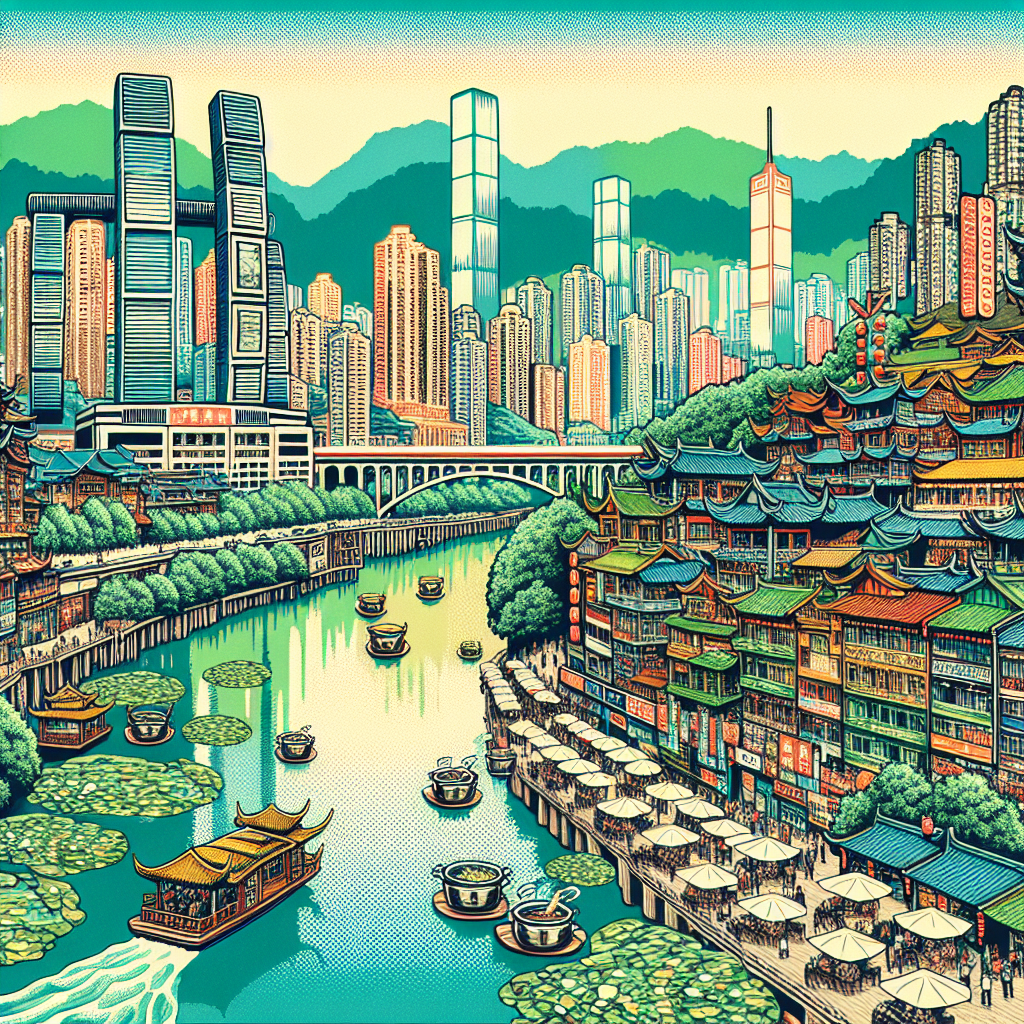

In [40]:
# Passe the city name to the function, prompting DALL-E to generate an image
# The function will return a PIL.Image object after decoding and loading the image data.
# The returned PIL.Image object is stored in the variable image. 
#This variable now holds an in-memory representation of the generated image, which can be displayed, saved, or further manipulated.
image = artist("Chongqing City") 

# display(image) is a Jupyter Notebook command that renders the PIL.Image object in the output cell of the notebook, allowing you to view the image directly.
display(image)

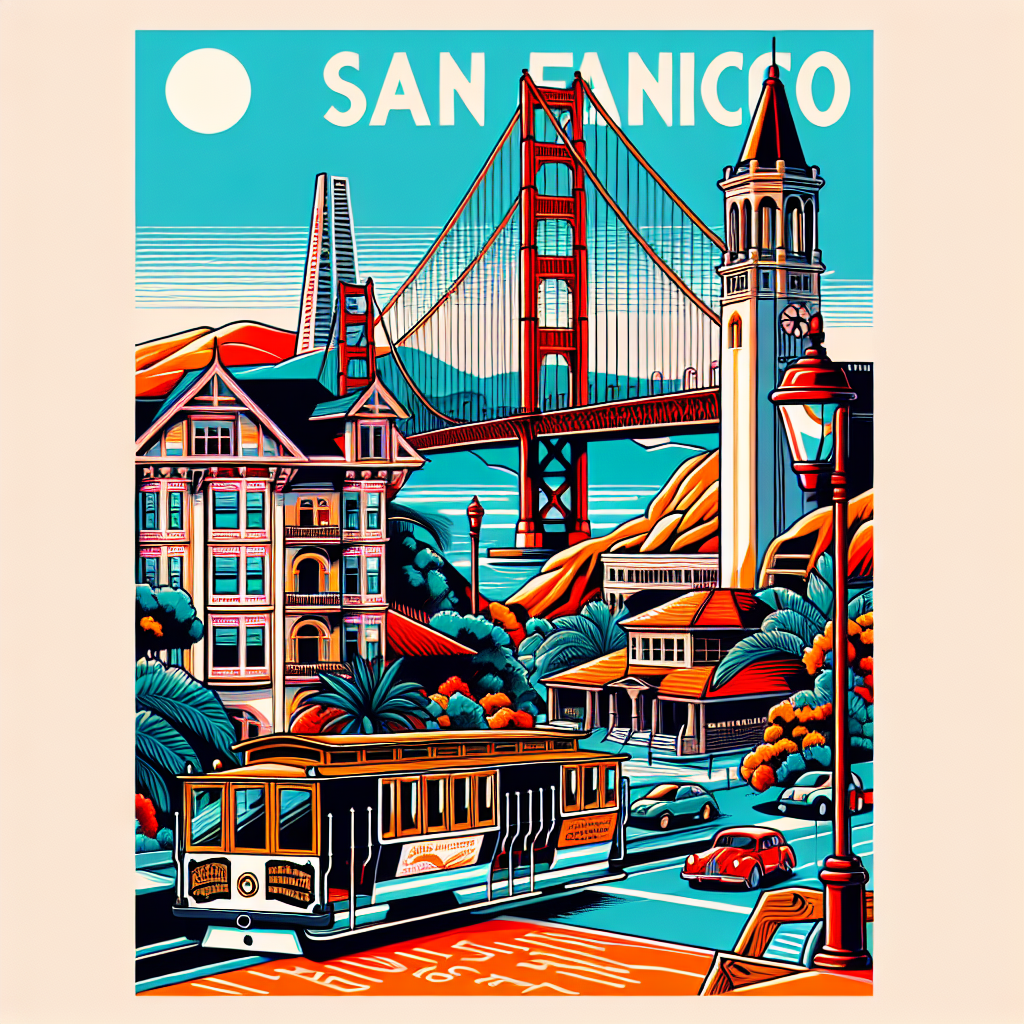

In [43]:
image = artist("San Francisco")
display(image)